In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math
R = 111194.926644
pi = math.pi
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
def classify(clean_data):
    
    #make lat_std, lng_std, stay_duration and Freq_per_day as features
    a = clean_data.groupby(by='ClientMacAddr', as_index=False)['Freq_per_day'].mean()
    a['lat_std'] = clean_data.groupby(by='ClientMacAddr', 
                                  as_index=False)['lat'].std()['lat'].apply(lambda x: x*R*pi/180)
    a['Stay_duration'] = clean_data.groupby(by='ClientMacAddr', 
                                        as_index=False)['Stay_duration'].mean()['Stay_duration']
    a['lng_std'] = clean_data.groupby(by='ClientMacAddr', 
                                  as_index=False)['lng'].std()['lng'].apply(lambda x: x*R*pi*math.cos(51*pi/180)/180)
    
    #use the stayduration and Freq_per_day as Kmeans features
    km = KMeans(n_clusters=2,
            random_state=9).fit(a[['Freq_per_day', 'Stay_duration']].values)
    a['Category'] = km.labels_
    
    return a

In [ ]:
kiana_0f = classify(pd.read_csv('Kiana_0F.csv'))
kiana_1f = classify(pd.read_csv('Kiana_1F.csv'))
kiana_2f = classify(pd.read_csv('Kiana_2F.csv'))
kiana_3f = classify(pd.read_csv('Kiana_3F.csv'))

In [ ]:
def pp(df):
    sns.stripplot(data=df, x='Freq_per_day', y='Stay_duration', hue = 'Category')
    plt.show()

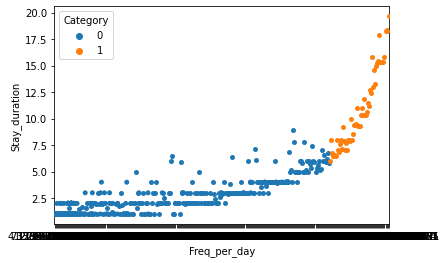

In [ ]:
pp(kiana_0f)

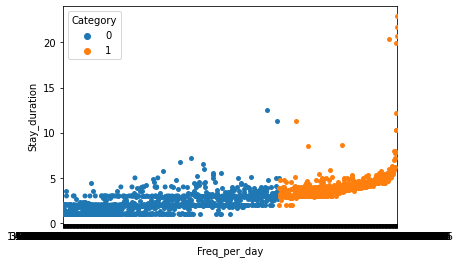

In [ ]:
pp(kiana_1f)

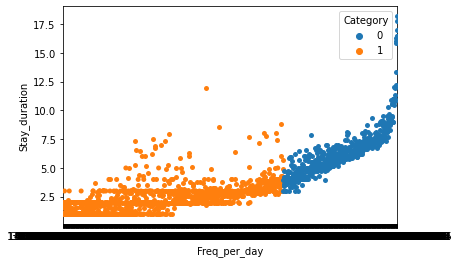

In [ ]:
pp(kiana_2f)

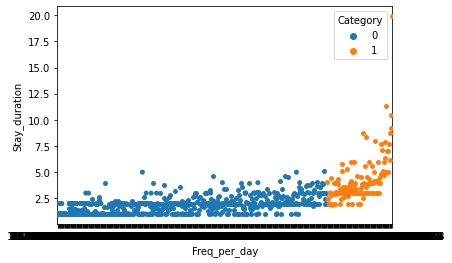

In [ ]:
pp(kiana_3f)

Left lower corner is PERSON and right upper corner is MACHINE.

In [ ]:
print('0F person:'+ str(kiana_0f[kiana_0f['Category']==0].shape[0]),
      '0F machine:'+ str(kiana_0f[kiana_0f['Category']==1].shape[0]), '\n')
print('1F person:'+ str(kiana_1f[kiana_1f['Category']==0].shape[0]),
      '1F machine:'+ str(kiana_1f[kiana_1f['Category']==1].shape[0]), '\n')
print('2F person:'+ str(kiana_2f[kiana_2f['Category']==1].shape[0]),
      '2F machine:'+ str(kiana_2f[kiana_2f['Category']==0].shape[0]), '\n')
print('3F person:'+ str(kiana_3f[kiana_3f['Category']==0].shape[0]),
      '3F machine:'+ str(kiana_3f[kiana_3f['Category']==1].shape[0]), '\n')


0F person:764 0F machine:60 

1F person:2135 1F machine:446 

2F person:6557 2F machine:549 

3F person:1957 3F machine:121 



In [ ]:
person_0f = kiana_0f.loc[kiana_0f['Category']==0]
person_0f['Floor'] = np.array([0]*person_0f.shape[0])

person_1f = kiana_1f.loc[kiana_1f['Category']==0]
person_1f['Floor'] = np.array([1]*person_1f.shape[0])

person_2f = kiana_2f.loc[kiana_2f['Category']==1]
person_2f['Floor'] = np.array([2]*person_2f.shape[0])

person_3f = kiana_3f.loc[kiana_3f['Category']==0]
person_3f['Floor'] = np.array([3]*person_3f.shape[0])

/tmp/SLURM_12353950/ipykernel_21954/1583099618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_0f['Floor'] = np.array([0]*person_0f.shape[0])
/tmp/SLURM_12353950/ipykernel_21954/1583099618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_1f['Floor'] = np.array([1]*person_1f.shape[0])
/tmp/SLURM_12353950/ipykernel_21954/1583099618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
list_person = [person_0f, person_1f, person_2f, person_3f]
person_mac = pd.concat(list_person)
person_mac['Category'] = np.array([0]*person_mac.shape[0])

In [ ]:
person_mac.to_csv('person.csv')

In [ ]:
person_mac

,ClientMacAddr,Freq_per_day,lat_std,Stay_duration,lng_std,Category,Floor
0,00:00:00:00:00:00,29.000000,0.018552,2.000000,0.035640,0,0
1,00:0b:82:d0:ff:35,41.294737,0.047863,1.578947,0.047723,0,0
2,00:0c:e7:fe:2a:94,13.000000,0.000000,1.000000,0.000000,0,0
3,00:10:20:ce:df:1d,35.000000,0.037725,3.000000,0.056515,0,0
9,00:b3:62:4e:0f:c9,12.058824,0.100345,1.529412,0.031896,0,0
...,...,...,...,...,...,...,...
2073,f8:a2:d6:b4:66:63,99.000000,0.018395,1.000000,0.038682,0,3
2074,f8:c3:9e:8a:cc:52,161.000000,0.039492,1.000000,0.051798,0,3
2075,f8:e0:79:eb:48:68,18.000000,0.032692,1.000000,0.221697,0,3
2076,f8:ff:c2:c0:0b:8b,237.042553,0.043990,2.326241,0.172328,0,3


In [ ]:
machine_0f = kiana_0f.loc[kiana_0f['Category']==1]
machine_0f['Floor'] = np.array([0]*machine_0f.shape[0])

machine_1f = kiana_1f.loc[kiana_1f['Category']==1]
machine_1f['Floor'] = np.array([1]*machine_1f.shape[0])

machine_2f = kiana_2f.loc[kiana_2f['Category']==0]
machine_2f['Floor'] = np.array([2]*machine_2f.shape[0])

machine_3f = kiana_3f.loc[kiana_3f['Category']==1]
machine_3f['Floor'] = np.array([3]*machine_3f.shape[0])

/tmp/SLURM_12353950/ipykernel_21954/699868627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_0f['Floor'] = np.array([0]*machine_0f.shape[0])
/tmp/SLURM_12353950/ipykernel_21954/699868627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_1f['Floor'] = np.array([1]*machine_1f.shape[0])
/tmp/SLURM_12353950/ipykernel_21954/699868627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
list_machine = [machine_0f, machine_1f, machine_2f, machine_3f]
machine_mac = pd.concat(list_machine)
machine_mac['Category'] = np.array([1]*machine_mac.shape[0])

In [ ]:
machine_mac.to_csv('machine.csv')

In [ ]:
machine_mac

,ClientMacAddr,Freq_per_day,lat_std,Stay_duration,lng_std,Category,Floor
4,00:23:a7:e7:96:0c,5378.699258,0.033894,15.371143,0.021194,1,0
5,00:23:a7:e7:a8:1c,5080.000000,0.008490,15.000000,0.007667,1,0
6,00:26:c6:6d:02:3e,5470.924428,0.048923,15.787148,0.031102,1,0
7,00:28:f8:26:ae:e4,5226.495092,0.018679,15.381769,0.010157,1,0
8,00:80:92:df:7b:97,3905.074778,0.039068,11.450048,0.031565,1,0
...,...,...,...,...,...,...,...
2039,e4:a7:a0:99:bd:e9,493.000000,0.024648,3.000000,0.106408,1,3
2046,e4:a7:a0:99:dd:ec,641.000000,0.033193,3.000000,0.096531,1,3
2063,f0:8a:76:f7:3f:e4,1097.879286,0.043205,11.354157,0.156187,1,3
2066,f4:0e:22:b7:d5:d9,2906.814953,0.043978,10.436582,0.151363,1,3
